# Comparing SE Photometry vs Legacy DR9 Catalog

* SE cats are on draco:
  * on draco: /data-pool/Halpha/coadds/all-virgo-coadds/SEcats_getzp
  * copying them locally to: ~/research/Virgo/photomery-SE-legacy-comparison/
* panstarrs catalogs
  * on draco: /data-pool/Halpha/coadds/all-virgo-coadds/*pan_tab.csv
  * copying them locally to:  ~/research/Virgo/photomery-SE-legacy-comparison/panstarrs_cats
  * wait, do I need these?  maybe
* legacy dr9 catalog

maybe run this on datalab?



https://datalab.noirlab.edu/data-explorer?showTable=ls_dr10.apflux


```
SELECT 
    ap.apflux_g_4, 
    ap.apflux_g_5, 
    ap.apflux_r_4, 
    ap.apflux_r_5
FROM ls_dr10.apflux AS ap
JOIN ls_dr10.bricks AS br 
    ON ap.brickid = br.brickid  
JOIN ls_dr10.photo_z AS pz
    ON ap.ls_id = pz.ls_id          
WHERE br.ra BETWEEN 200 AND 225
  AND br.dec BETWEEN 3 AND 8
  AND pz.z_spec < 0.01;

```

```
SELECT 
    ap.apflux_g_4 AS gap4, 
    ap.apflux_g_5 AS gap5, 
    ap.apflux_r_4 AS rap4, 
    ap.apflux_r_5 AS rap5,
    tr.mag_r
FROM ls_dr10.apflux AS ap
JOIN ls_dr10.tractor AS tr 
    ON ap.ls_id = tr.ls_id 
JOIN ls_dr10.photo_z AS pz
    ON ap.ls_id = pz.ls_id          
WHERE tr.ra BETWEEN 200 AND 225
    AND tr.dec BETWEEN 3 AND 8
    AND pz.z_spec < 0.01 
    AND tr.mag_r BETWEEN 10 and 19;
```

```
SELECT 
    ap.apflux_g_4 AS gap4, 
    ap.apflux_g_5 AS gap5, 
    ap.apflux_r_4 AS rap4, 
    ap.apflux_r_5 AS rap5,
    tr.mag_r
FROM ls_dr10.apflux AS ap
JOIN ls_dr10.tractor AS tr 
    ON ap.ls_id = tr.ls_id           
WHERE tr.ra BETWEEN 200 AND 225
    AND tr.dec BETWEEN 3 AND 8
    AND pz.z_spec < 0.01 
    AND tr.mag_r BETWEEN 10 and 19;
```


```
SELECT 
    tr.mag_r, tr.mag_g, tr.g_r, tr.r_i, tr.type
FROM ls_dr10.tractor AS tr         
WHERE tr.ra BETWEEN 200 AND 225
    AND tr.dec BETWEEN 3 AND 8
    AND tr.mag_r BETWEEN 14 and 17
    AND tr.mag_g BETWEEN 14 and 17
    AND tr.trace = 'PSF';
```

In [50]:
import os
import glob
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from scipy.stats import median_abs_deviation as MAD


homedir = os.getenv("HOME")

# Offset between Legacy and VFS magnitudes
* look up how panstarrs mags are measured - are they psf mag vs aperture mag
  * can we resolve the 0.1 mag offset that we see between legacy and our magnitudes
 
# Higher scatter 
* plot residuals vs (g-r), (r-i) and (r-z)
* 

In [9]:
catdir = homedir + '/research/Virgo/photometry-SE-legacy-comparison/matched_panstarrs_se_tables/'

In [10]:
catdir

'/Users/rfinn/research/Virgo/photometry-SE-legacy-comparison/matched_panstarrs_se_tables/'

In [11]:
tels = ['BOK','INT','HDI','HDI','MOS']
filters = ['r','r','r','R','R']


# Color transformations from Matteo

Missing the following filters
* INT red halpha filter
* 

## 90Prime

#### Halpha

From Matteo

```
---------------------------------------------------------------------

Number of stars meeting the color and brightness cuts: 54842

---------------------------------------------------------------------

Best fit linear    Ha4 - BASSr = -0.1274 * (PS1_g-PS1_r) + 0.0151

Best fit quadratic Ha4 - BASSr = -0.0230*(PS1_g-PS1_r)^2 + -0.0976*(PS1_g-PS1_r) + 0.0063

---------------------------------------------------------------------

Initial bias/scatter:             -0.0608/0.0276

Corr linear fit              :    -0.0000/0.0125

Corr quadratic fit           :    0.0000/0.0125

---------------------------------------------------------------------
```

```
---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54775
---------------------------------------------------------------------
Best fit linear    Ha4 - BASSr = -0.0866 * (PS1_g-PS1_i) + 0.0125
Best fit quadratic Ha4 - BASSr = -0.0148*(PS1_g-PS1_i)^2 + -0.0592*(PS1_g-PS1_i) + 0.0012
---------------------------------------------------------------------
Initial bias/scatter:             -0.0610/0.0278
Corr linear fit              :    -0.0000/0.0119
Corr quadratic fit           :    0.0000/0.0118
---------------------------------------------------------------------
```

#### BASS r


From https://www.legacysurvey.org/dr10/description/#photometry
```
BASSr - PS1_r = 0.00110 - 0.06875 * (g-i) + 0.02480 * (g-i)^2 - 0.00855 * (g-i)^3

```


## Mosaic

#### KPNO Halpha+4nm


#### Harris R

```
LCS KP Harris R

---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54683
---------------------------------------------------------------------
Best fit linear    KPHr - PS1_r = -0.1644 * (PS1_g-PS1_r) + 0.0149
Best fit quadratic KPHr - PS1_r = 0.0170*(PS1_g-PS1_r)^2 + -0.1864*(PS1_g-PS1_r) + 0.0213
Best fit cubic     KPHr - PS1_r = -0.1553*(PS1_g-PS1_r)^3 + 0.3142*(PS1_g-PS1_r)^2 + -0.3636*(PS1_g-PS1_r) + 0.0541
---------------------------------------------------------------------
Initial bias/scatter:             -0.0831/0.0337
Corr linear fit              :    -0.0000/0.0110
Corr quadratic fit           :    -0.0000/0.0110
Corr cubic fit               :    -0.0000/0.0109
---------------------------------------------------------------------
```

```

LCS Ha4 filter

---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54843
---------------------------------------------------------------------
Best fit linear    Ha4 - PS1_r = -0.2113 * (PS1_g-PS1_r) + 0.0162
Best fit quadratic Ha4 - PS1_r = 0.0016*(PS1_g-PS1_r)^2 + -0.2134*(PS1_g-PS1_r) + 0.0168
Best fit cubic     Ha4 - PS1_r = -0.2940*(PS1_g-PS1_r)^3 + 0.5647*(PS1_g-PS1_r)^2 + -0.5492*(PS1_g-PS1_r) + 0.0789
---------------------------------------------------------------------
Initial bias/scatter:             -0.1097/0.0434
Corr linear fit              :    -0.0000/0.0148
Corr quadratic fit           :    0.0000/0.0148
Corr cubic fit               :    -0.0000/0.0146
---------------------------------------------------------------------

LCS KP Sloan r

---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54842
---------------------------------------------------------------------
Best fit linear    KPSr - PS1_r = -0.0310 * (PS1_g-PS1_r) + 0.0004
Best fit quadratic KPSr - PS1_r = 0.0084*(PS1_g-PS1_r)^2 + -0.0420*(PS1_g-PS1_r) + 0.0036
Best fit cubic     KPSr - PS1_r = -0.0219*(PS1_g-PS1_r)^3 + 0.0504*(PS1_g-PS1_r)^2 + -0.0670*(PS1_g-PS1_r) + 0.0082
---------------------------------------------------------------------
Initial bias/scatter:             -0.0181/0.0063
Corr linear fit              :    -0.0000/0.0019
Corr quadratic fit           :    0.0000/0.0019
Corr cubic fit               :    -0.0000/0.0019
---------------------------------------------------------------------

```



## INT Tranformations

#### INT Halpha

```
LCS INT Ha

---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54841
---------------------------------------------------------------------
Best fit linear    Intha - PS1_r = -0.2426 * (PS1_g-PS1_r) + 0.0705
Best fit quadratic Intha - PS1_r = 0.0182*(PS1_g-PS1_r)^2 + -0.2662*(PS1_g-PS1_r) + 0.0774
Best fit cubic     Intha - PS1_r = -0.3676*(PS1_g-PS1_r)^3 + 0.7233*(PS1_g-PS1_r)^2 + -0.6876*(PS1_g-PS1_r) + 0.1556
---------------------------------------------------------------------
Initial bias/scatter:             -0.0742/0.0507
Corr linear fit              :    -0.0000/0.0192
Corr quadratic fit           :    0.0000/0.0191
Corr cubic fit               :    -0.0000/0.0189
---------------------------------------------------------------------
```

### INT r
```
LCS INT Sloan r

---------------------------------------------------------------------
Number of stars meeting the color and brightness cuts: 54818
---------------------------------------------------------------------
Best fit linear    INTSr - PS1_r = -0.0092 * (PS1_g-PS1_r) + -0.0006
Best fit quadratic INTSr - PS1_r = 0.0023*(PS1_g-PS1_r)^2 + -0.0122*(PS1_g-PS1_r) + 0.0003
Best fit cubic     INTSr - PS1_r = -0.0035*(PS1_g-PS1_r)^3 + 0.0090*(PS1_g-PS1_r)^2 + -0.0162*(PS1_g-PS1_r) + 0.0010
---------------------------------------------------------------------
Initial bias/scatter:             -0.0061/0.0020
Corr linear fit              :    -0.0000/0.0009
Corr quadratic fit           :    -0.0000/0.0009
Corr cubic fit               :    -0.0000/0.0009
---------------------------------------------------------------------
```

# Functions

In [71]:
def get_dmag(table,naper=5):
    
    return table['rmag'] - table['MAG_APER'][:,naper]
    #return table['pan2instmag'] - table['MAG_APER'][:,naper]

def get_pan_color(table,colname1,colname2):
    return table[colname1] - table[colname2]

52
109
11
19
6


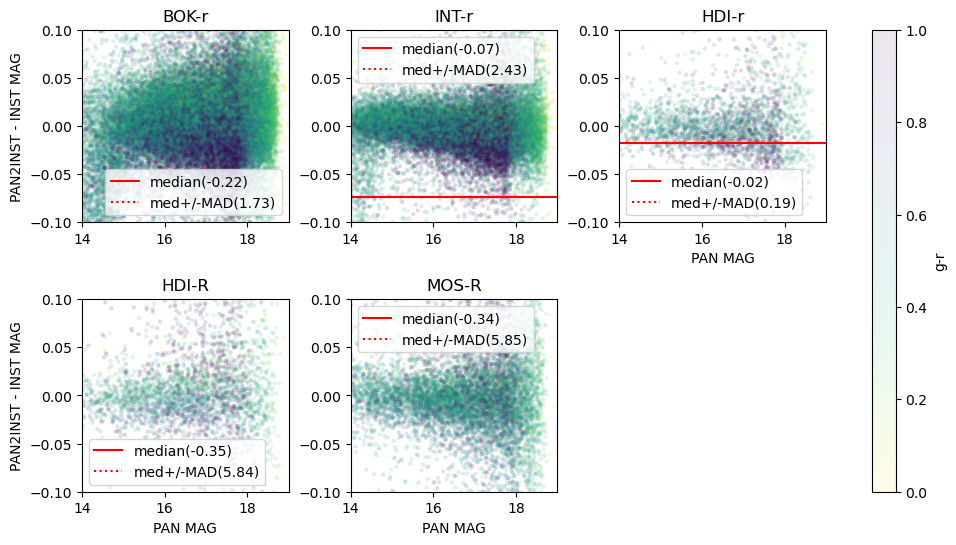

In [70]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
dy = 0.1
allax = []
for i,tel in enumerate(tels):
    plt.subplot(2,3,i+1)
    file_list = glob.glob(f"{catdir}/*{tel}*_{filters[i]}*pan_SE_tab.fits")
    print(len(file_list))
    x = []
    dmag = []
    color = []
    for f in file_list:
        tab = Table.read(f)
        dmag = dmag + get_dmag(tab).tolist()
        color = color + get_pan_color(tab,'gmag','rmag').tolist()
        x = x + np.array(tab['rmag']).tolist()
    x = np.array(x)
    dmag = np.array(dmag)
    color = np.array(color)
    sc = plt.scatter(x,dmag,c=color,s=5,alpha=0.1,vmin=0, vmax=1,cmap='viridis_r')
    # add lines
    med = np.median(dmag)
    mad = MAD(dmag)

    flag = dmag < dy
    med = np.mean(dmag[flag])
    mad = np.std(dmag[flag])
    
    plt.axhline(y=med,ls='-',color='r',label=f'median({med:.2f})')
    plt.axhline(y=med+mad,ls=':',color='r',label=f'med+/-MAD({mad:.2f})')
    plt.axhline(y=med-mad,ls=':',color='r')#,label=f'med-MAD({mad:.2f})')    
    plt.ylim(-dy,dy)
    plt.xlim(14,19)
    plt.title(f"{tel}-{filters[i]}")
    
    if i in [0,3]:
        plt.ylabel("PAN2INST - INST MAG")
    if i > 1:
        plt.xlabel("PAN MAG")
    allax.append(plt.gca())
    plt.legend()
plt.colorbar(sc, label='g-r', ax=allax)



# Instrument Magnitude vs Panstarrs Mag

66
111
11
19
6


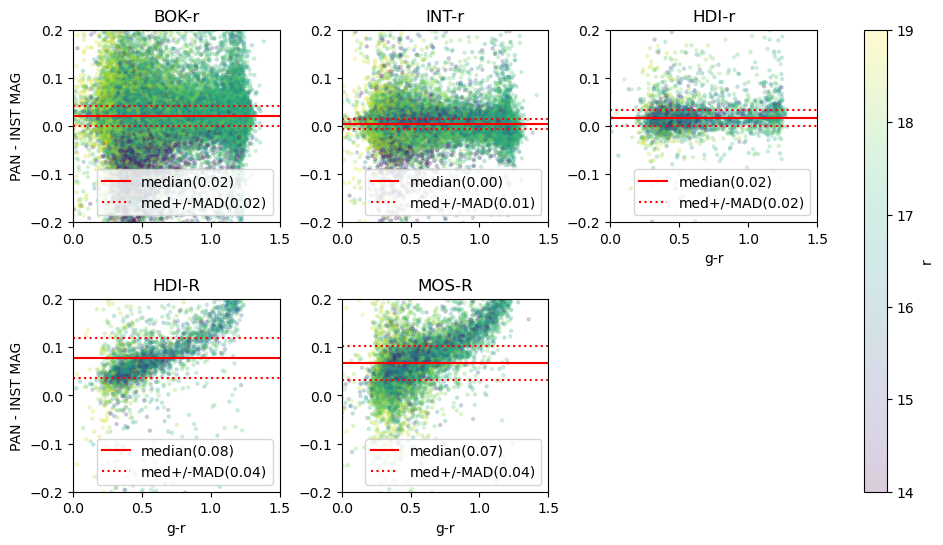

In [89]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
dy = 0.2
v1 = 14
v2 = 19
x1 = 0
x2 = 1.5
allax = []
for i,tel in enumerate(tels):
    plt.subplot(2,3,i+1)
    file_list = glob.glob(f"{catdir}/*{tel}*_{filters[i]}*pan_SE_tab.fits")
    print(len(file_list))
    x = []
    dmag = []
    color = []
    for f in file_list:
        tab = Table.read(f)
        dmag = dmag + (tab['rmag'] - tab['MAG_APER'][:,5]).tolist()
        color = color + get_pan_color(tab,'gmag','rmag').tolist()
        x = x + np.array(tab['rmag']).tolist()
    x = np.array(x)
    dmag = np.array(dmag)
    color = np.array(color)
    sc = plt.scatter(color,dmag,c=x,s=5,alpha=0.2,vmin=v1, vmax=v2)
    # add lines
    med = np.median(dmag)
    mad = MAD(dmag)

    #med = np.mean(dmag)
    #mad = np.std(dmag)
    
    plt.axhline(y=med,ls='-',color='r',label=f'median({med:.2f})')
    plt.axhline(y=med+mad,ls=':',color='r',label=f'med+/-MAD({mad:.2f})')
    plt.axhline(y=med-mad,ls=':',color='r')#,label=f'med-MAD({mad:.2f})')    
    plt.ylim(-dy,dy)
    plt.xlim(x1,x2)
    plt.title(f"{tel}-{filters[i]}")
    
    if i in [0,3]:
        plt.ylabel("PAN - INST MAG")
    if i > 1:
        plt.xlabel("g-r")
    allax.append(plt.gca())
    plt.legend()
plt.colorbar(sc, label='r', ax=allax)



# Can We Put Our Mags on PANSTARRS system?




In [80]:
def get_inst_mag(r,gr,tel):
    """
    PARAMS:
    * r : r-band mag, panstarrs
    * gr : gr color
    * tel : telescope; can be INT, BOK, HDI, or MOS

    RETURN:
    *instrument_r : instrumental r-band mag
    """
    PS1_r = r
    
    if tel == 'INT':
        C2, C1, C0 = 0.0023, -0.0122, .0003
    elif tel == 'MOS':
        C2, C1, C0 = 0.0170, -0.1864, 0.0213

    elif tel == 'HDI': # doesn't seem right that I am using the same transform for HDI and BOK!
        C2, C1, C0 = 0.0084, -0.0420, 0.0036
        C2, C1, C0 = 0.0170, -0.1864, 0.0213
    elif tel == 'BOK':
        C2, C1, C0 = 0.0084, -0.0420, 0.0036
    else:
        print("WARNING: telescope not found - no conversion")
        return r
    
    instrument_r = r + C2*(gr)**2 + C1*(gr) + C0
    return instrument_r

def get_PS_mag(inst_r,gr,tel,filt):
    """
    PARAMS:
    * inst_r : instrument r-band mag
    * gr : gr color (panstarrs or approx equal)
    * tel : telescope; can be INT, BOK, HDI, or MOS

    RETURN:
    *PSr : PS r-band mag
    """
    PS1_r = inst_r
    
    if tel == 'INT':
        C2, C1, C0 = 0.0023, -0.0122, .0003
    elif (tel == 'MOS') | ((tel == 'HDI') & (filt == 'R')) :
        C2, C1, C0 = 0.0170, -0.1864, 0.0213

    elif (tel == 'BOK') | ((tel == 'HDI') & (filt == 'r')) :
        C2, C1, C0 = 0.0084, -0.0420, 0.0036
    else:
        print("WARNING: telescope not found - no conversion")
        return r
    
    PSr = inst_r - C2*(gr)**2 - C1*(gr) - C0
    return PSr


BOK-r: 66 coadds
INT-r: 109 coadds
HDI-r: 11 coadds
HDI-R: 19 coadds
MOS-R: 6 coadds
Total number of coadds: 211


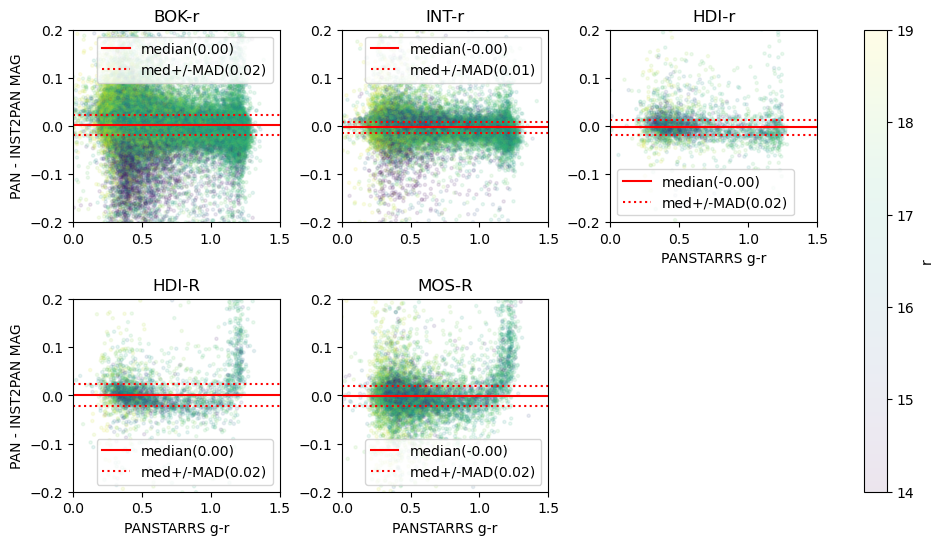

In [88]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
dy = 0.2
v1 = 14
v2 = 19
x1 = 0
x2 = 1.5
allax = []
ncoadd = 0
for i,tel in enumerate(tels):
    plt.subplot(2,3,i+1)
    file_list = glob.glob(f"{catdir}/*{tel}*_{filters[i]}*pan_SE_tab.fits")
    print(f"{tel}-{filters[i]}: {len(file_list)} coadds")
    ncoadd += len(file_list)
    x = []
    dmag = []
    color = []
    for f in file_list:
        tab = Table.read(f)
        keepflag = tab['e_rmag'] < 0.01
        tab = tab[keepflag]
        
        ccolor = get_pan_color(tab,'gmag','rmag')
        color = color + ccolor.tolist() 
        
        psmag = get_PS_mag(tab['MAG_APER'][:,5],ccolor,tel,filters[i])
        
        ddmag = tab['rmag'] - psmag
        dmag = dmag + ddmag.tolist()

        x = x + np.array(tab['rmag']).tolist()
    x = np.array(x)
    dmag = np.array(dmag)
    color = np.array(color)
    sc = plt.scatter(color,dmag,c=x,s=5,alpha=0.1,vmin=v1, vmax=v2)
    # add lines
    med = np.median(dmag)
    mad = MAD(dmag)

    #med = np.mean(dmag)
    #mad = np.std(dmag)
    
    plt.axhline(y=med,ls='-',color='r',label=f'median({med:.2f})')
    plt.axhline(y=med+mad,ls=':',color='r',label=f'med+/-MAD({mad:.2f})')
    plt.axhline(y=med-mad,ls=':',color='r')#,label=f'med-MAD({mad:.2f})')    
    plt.ylim(-dy,dy)
    plt.xlim(x1,x2)
    plt.title(f"{tel}-{filters[i]}")
    
    if i in [0,3]:
        plt.ylabel("PAN - INST2PAN MAG")
    if i > 1:
        plt.xlabel("PANSTARRS g-r")

    # plot conversion from instrument mag to 
    allax.append(plt.gca())
    plt.legend()
plt.colorbar(sc, label='r', ax=allax)
print(f"Total number of coadds: {ncoadd}")


# Get Legacy photometry

* did this in datalab

```
/Virgo-photometry/virgofilament_legacy_star_phot_comparison.ipynb
```